In [1]:
!pip install praw

     ------------------------------------ 189.3/189.3 kB 458.1 kB/s eta 0:00:00


In [2]:
!pip install pandas numpy matplotlib seaborn

In [3]:
!pip install praw requests scikit-learn nltk

In [11]:
# Import libraries
import praw
import pandas as pd
from datetime import datetime

# Configuring the Reddit API 
reddit = praw.Reddit(
    client_id="1CIygQZMHh6mWN5evSn2vg",         
    client_secret="MgsGg-6Bzpm8wnEoVRGPdVg-05HgPw",
    user_agent="CryptoSentimentApp"   
)

# this function fetch Reddit posts
def fetch_reddit_posts(subreddit, keyword, limit=100):
    """
    Fetches posts from a given subreddit containing a specific keyword.
    
    Args:
        subreddit (str): Name of the subreddit.
        keyword (str): Keyword to search for.
        limit (int): Number of posts to fetch.

    Returns:
        pd.DataFrame: DataFrame containing post details.
    """
    subreddit = reddit.subreddit(subreddit)
    posts = []
    
    for post in subreddit.search(keyword, limit=limit):
        posts.append({
            "title": post.title,
            "text": post.selftext,
            "created_utc": post.created_utc,
            "upvotes": post.score,
            "num_comments": post.num_comments,
        })
    
    # Convert to DataFrame
    df = pd.DataFrame(posts)
    df["created_at"] = pd.to_datetime(df["created_utc"], unit="s")
    return df

# Example usage
subreddit_name = "cryptocurrency"
search_keyword = "bitcoin"
limit = 500

# Fetching Reddit posts with this piece of code
reddit_data = fetch_reddit_posts(subreddit_name, search_keyword, limit)
reddit_data.to_csv("reddit_posts.csv", index=False)
print("Data saved to reddit_posts.csv")

reddit_data.head()


Data saved to reddit_posts.csv


,title,text,created_utc,upvotes,num_comments,created_at
0,"Satoshi Era Bitcoin Whale moved 2,000 BTC for ...",,1.731707e+09,5910,608,2024-11-15 21:36:10
1,Bitcoin has followed a consistent 4-year cycle...,,1.731496e+09,3525,696,2024-11-13 11:04:46
2,El Salvador’s Bitcoin holdings reached $531 mi...,,1.731399e+09,5635,390,2024-11-12 08:16:10
3,Ethereum falls to 4-year low against Bitcoin a...,,1.732113e+09,2752,533,2024-11-20 14:27:25
4,Jim Cramer says: “All I can tell you is own Bi...,,1.732289e+09,2036,869,2024-11-22 15:24:37


In [5]:
reddit_data.head(30)

,title,text,created_utc,upvotes,num_comments,created_at
0,"Satoshi Era Bitcoin Whale moved 2,000 BTC for ...",,1.731707e+09,5912,608,2024-11-15 21:36:10
1,Bitcoin has followed a consistent 4-year cycle...,,1.731496e+09,3523,696,2024-11-13 11:04:46
2,El Salvador’s Bitcoin holdings reached $531 mi...,,1.731399e+09,5632,390,2024-11-12 08:16:10
3,Ethereum falls to 4-year low against Bitcoin a...,,1.732113e+09,2748,533,2024-11-20 14:27:25
4,Jim Cramer says: “All I can tell you is own Bi...,,1.732289e+09,2035,869,2024-11-22 15:24:37
5,Bitcoin is just 2% away from breaking its all-...,,1.730228e+09,3571,396,2024-10-29 18:49:41
6,Satoshi Bitcoin wallets now worth over $100 bi...,,1.731590e+09,2658,442,2024-11-14 13:20:30
7,El Salvador Continues to Purchase 1 Bitcoin Ev...,,1.732798e+09,2800,286,2024-11-28 12:54:39
8,Bitcoin spot ETF finally approved,,1.704919e+09,5423,785,2024-01-10 20:44:59
9,"Bitcoin Nears $98,000, Just 2% Away From Six F...",,1.732166e+09,2165,305,2024-11-21 05:16:57


In [12]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         230 non-null    object        
 1   text          230 non-null    object        
 2   created_utc   230 non-null    float64       
 3   upvotes       230 non-null    int64         
 4   num_comments  230 non-null    int64         
 5   created_at    230 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 10.9+ KB


In [13]:
# Check the first few rows
print(reddit_data.head())

# Check for missing values
print(reddit_data.isnull().sum())

# Descriptive statistics for numeric columns
print(reddit_data.describe())


                                               title text   created_utc  \
0  Satoshi Era Bitcoin Whale moved 2,000 BTC for ...       1.731707e+09   
1  Bitcoin has followed a consistent 4-year cycle...       1.731496e+09   
2  El Salvador’s Bitcoin holdings reached $531 mi...       1.731399e+09   
3  Ethereum falls to 4-year low against Bitcoin a...       1.732113e+09   
4  Jim Cramer says: “All I can tell you is own Bi...       1.732289e+09   

   upvotes  num_comments          created_at  
0     5910           608 2024-11-15 21:36:10  
1     3525           696 2024-11-13 11:04:46  
2     5635           390 2024-11-12 08:16:10  
3     2752           533 2024-11-20 14:27:25  
4     2036           869 2024-11-22 15:24:37  
title           0
text            0
created_utc     0
upvotes         0
num_comments    0
created_at      0
dtype: int64
        created_utc       upvotes  num_comments
count  2.300000e+02    230.000000    230.000000
mean   1.674141e+09   4935.556522    795.982609
st

In [14]:
print(reddit_data.isnull().sum())

title           0
text            0
created_utc     0
upvotes         0
num_comments    0
created_at      0
dtype: int64


In [15]:
# Fill missing text with empty strings or drop rows
reddit_data["text"].fillna("", inplace=True)
# or
# reddit_data.dropna(subset=["text"], inplace=True)


In [16]:
reddit_data.set_index("timestamp", inplace=True)
reddit_data = reddit_data.resample("D").mean()

KeyError: "None of ['timestamp'] are in the columns"

In [17]:
reddit_data.set_index("timestamp", inplace=True)  # Set timestamp as index
reddit_data = reddit_data.resample("D").mean()    # Resample to daily intervals


KeyError: "None of ['timestamp'] are in the columns"

In [18]:
reddit_data.head(34)

,title,text,created_utc,upvotes,num_comments,created_at
0,"Satoshi Era Bitcoin Whale moved 2,000 BTC for ...",,1.731707e+09,5910,608,2024-11-15 21:36:10
1,Bitcoin has followed a consistent 4-year cycle...,,1.731496e+09,3525,696,2024-11-13 11:04:46
2,El Salvador’s Bitcoin holdings reached $531 mi...,,1.731399e+09,5635,390,2024-11-12 08:16:10
3,Ethereum falls to 4-year low against Bitcoin a...,,1.732113e+09,2752,533,2024-11-20 14:27:25
4,Jim Cramer says: “All I can tell you is own Bi...,,1.732289e+09,2036,869,2024-11-22 15:24:37
5,Bitcoin is just 2% away from breaking its all-...,,1.730228e+09,3574,396,2024-10-29 18:49:41
6,Satoshi Bitcoin wallets now worth over $100 bi...,,1.731590e+09,2655,442,2024-11-14 13:20:30
7,El Salvador Continues to Purchase 1 Bitcoin Ev...,,1.732798e+09,2797,286,2024-11-28 12:54:39
8,Bitcoin spot ETF finally approved,,1.704919e+09,5423,785,2024-01-10 20:44:59
9,"Bitcoin Nears $98,000, Just 2% Away From Six F...",,1.732166e+09,2161,305,2024-11-21 05:16:57


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\damil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


created_at
2019-06-18    0.21075
2019-06-21    0.00000
2019-07-12    0.05620
2021-01-29    0.00000
2021-02-08    0.67095
Name: combined_sentiment, dtype: float64


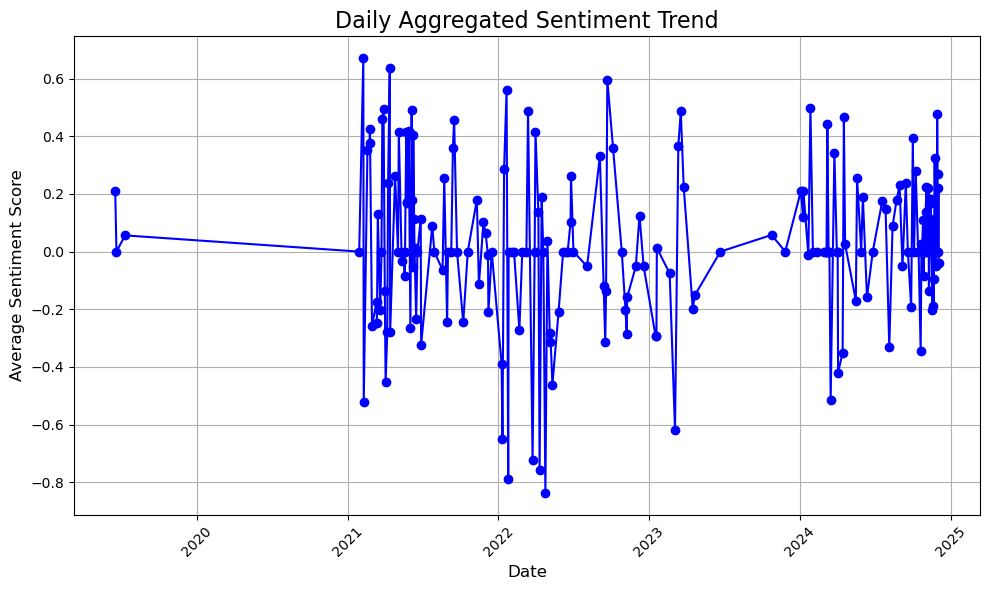

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Load the data
reddit_data = pd.read_csv("reddit_posts.csv")

# Initialize the VADER Sentiment Analyzer
from nltk import download
download('vader_lexicon')  # Download VADER lexicon
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score for a given text
def calculate_sentiment(text):
    if isinstance(text, str):  # Ensure text is valid
        sentiment = sia.polarity_scores(text)
        return sentiment['compound']  # Return compound score (-1 to 1)
    return 0  # Neutral score for missing text

# Calculate sentiment for 'title' and 'text'
reddit_data['title_sentiment'] = reddit_data['title'].apply(calculate_sentiment)
reddit_data['text_sentiment'] = reddit_data['text'].apply(calculate_sentiment)

# Combine title and text sentiment (average them)
reddit_data['combined_sentiment'] = reddit_data[['title_sentiment', 'text_sentiment']].mean(axis=1)

# Convert 'created_at' to datetime
reddit_data['created_at'] = pd.to_datetime(reddit_data['created_at'])

# Aggregate sentiment by day
aggregated_sentiment = reddit_data.groupby(reddit_data['created_at'].dt.date)['combined_sentiment'].mean()

# Save aggregated data
aggregated_sentiment.to_csv('aggregated_sentiment.csv', header=True)

# Output the results
print(aggregated_sentiment.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(aggregated_sentiment.index, aggregated_sentiment.values, marker='o', linestyle='-', color='blue')
plt.title('Daily Aggregated Sentiment Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


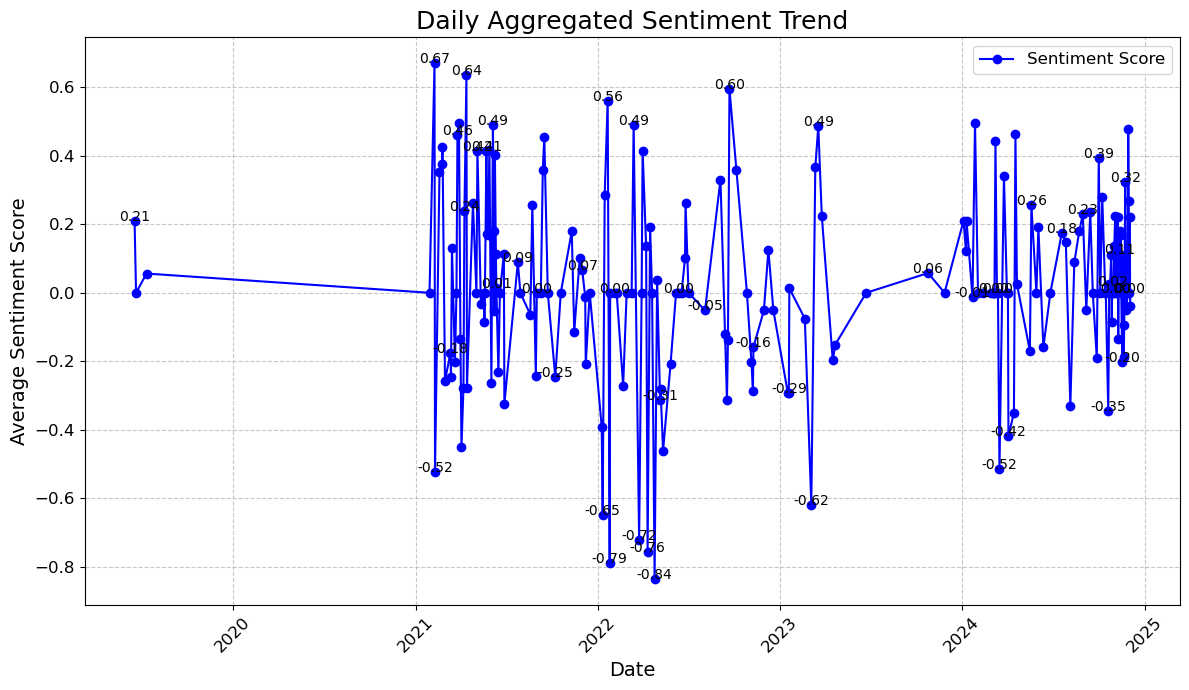

In [26]:
# just trying to create a refined visualization of sentiment trend
plt.figure(figsize=(12, 7))
plt.plot(aggregated_sentiment.index, aggregated_sentiment.values, marker='o', linestyle='-', color='blue', label='Sentiment Score')
plt.title('Daily Aggregated Sentiment Trend', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Annotate significant peaks and dips
for i, val in enumerate(aggregated_sentiment.values):
    if i % 5 == 0 or abs(val) > 0.5:  # Annotate every 5th point or scores above/below ±0.5
        plt.text(aggregated_sentiment.index[i], val, f"{val:.2f}", fontsize=10, ha='center')

plt.tight_layout()
plt.show()


In [27]:
!pip install requests

In [28]:
import requests
from datetime import datetime, timedelta

# CoinGecko API Configuration
COINGECKO_API_URL = "https://api.coingecko.com/api/v3"
CRYPTOCURRENCY = "bitcoin"  
CURRENCY = "usd"            

#this function fetch historical btc prices
def fetch_historical_prices(crypto, vs_currency, days):
    """
    Fetch historical price data for the given cryptocurrency.
    
    Args:
    - crypto (str): Cryptocurrency ID (e.g., 'bitcoin').
    - vs_currency (str): Market currency (e.g., 'usd').
    - days (int): Number of past days to fetch data for.

    Returns:
    - pd.DataFrame: DataFrame with historical price data.
    """
    url = f"{COINGECKO_API_URL}/coins/{crypto}/market_chart"
    params = {"vs_currency": vs_currency, "days": days}
    respon2se = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        # Extract daily prices
        prices = [
            {"timestamp": datetime.utcfromtimestamp(p[0] // 1000), "price": p[1]}
            for p in data["prices"]
        ]
        return pd.DataFrame(prices)
    else:
        print(f"Error fetching data: {response.status_code}")
        return pd.DataFrame()

# Fetching the last 30 days of Bitcoin prices
print("Fetching historical cryptocurrency price data...")
price_data = fetch_historical_prices(CRYPTOCURRENCY, CURRENCY, days=30)

if not price_data.empty:
    #we Save the data to CSV
    price_data.to_csv(f"{CRYPTOCURRENCY}_price_data.csv", index=False)
    print(f"Price data saved to {CRYPTOCURRENCY}_price_data.csv")
else:
    print("No data fetched.")


Fetching historical cryptocurrency price data...
Price data saved to bitcoin_price_data.csv


In [29]:
def fetch_historical_prices_range(crypto, vs_currency, from_date, to_date):
    """
    Fetch historical cryptocurrency prices for a specific date range.
    
    Args:
    - crypto (str): Cryptocurrency ID (e.g., 'bitcoin').
    - vs_currency (str): Market currency (e.g., 'usd').
    - from_date (str): Start date (format: 'YYYY-MM-DD').
    - to_date (str): End date (format: 'YYYY-MM-DD').

    Returns:
    - pd.DataFrame: DataFrame with historical price data.
    """
    url = f"{COINGECKO_API_URL}/coins/{crypto}/market_chart/range"
    from_timestamp = int(datetime.strptime(from_date, "%Y-%m-%d").timestamp())
    to_timestamp = int(datetime.strptime(to_date, "%Y-%m-%d").timestamp())
    
    params = {
        "vs_currency": vs_currency,
        "from": from_timestamp,
        "to": to_timestamp,
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        # Extract data into DataFrame
        prices = [
            {"timestamp": datetime.utcfromtimestamp(p[0] // 1000), "price": p[1]}
            for p in data["prices"]
        ]
        return pd.DataFrame(prices)
    else:
        print(f"Error fetching data: {response.status_code}")
        return pd.DataFrame()

# Example Usage: Fetch prices from January 1, 2023, to November 29, 2024
price_data_range = fetch_historical_prices_range(CRYPTOCURRENCY, CURRENCY, "2023-01-01", "2024-11-29")
price_data_range.to_csv(f"{CRYPTOCURRENCY}_price_data_long_range.csv", index=False)
print(f"Long-range price data saved to {CRYPTOCURRENCY}_price_data_long_range.csv")


Error fetching data: 401
Long-range price data saved to bitcoin_price_data_long_range.csv


In [30]:
def fetch_extended_historical_data(crypto, vs_currency, days):
    """
    Fetch historical prices, market cap, and volume for the given cryptocurrency.
    
    Args:
    - crypto (str): Cryptocurrency ID (e.g., 'bitcoin').
    - vs_currency (str): Market currency (e.g., 'usd').
    - days (int): Number of past days to fetch data for.

    Returns:
    - pd.DataFrame: DataFrame with prices, market cap, and volume.
    """
    url = f"{COINGECKO_API_URL}/coins/{crypto}/market_chart"
    params = {"vs_currency": vs_currency, "days": days}
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        # Combine data into a DataFrame
        records = []
        for i in range(len(data["prices"])):
            records.append({
                "timestamp": datetime.utcfromtimestamp(data["prices"][i][0] // 1000),
                "price": data["prices"][i][1],
                "market_cap": data["market_caps"][i][1],
                "volume": data["total_volumes"][i][1]
            })
        return pd.DataFrame(records)
    else:
        print(f"Error fetching data: {response.status_code}")
        return pd.DataFrame()

# Example Usage: Fetch prices, market cap, and volume for 90 days
extended_data = fetch_extended_historical_data(CRYPTOCURRENCY, CURRENCY, days=90)
extended_data.to_csv(f"{CRYPTOCURRENCY}_extended_data.csv", index=False)
print(f"Extended data saved to {CRYPTOCURRENCY}_extended_data.csv")


Extended data saved to bitcoin_extended_data.csv


In [31]:
import pandas as pd

# Load the cryptocurrency price data
price_data = pd.read_csv('bitcoin_price_data.csv')
price_data['timestamp'] = pd.to_datetime(price_data['timestamp'])
price_data['date'] = price_data['timestamp'].dt.date  # Extract date for merging

# Load the sentiment data
sentiment_data = pd.read_csv('aggregated_sentiment.csv')
sentiment_data['date'] = pd.to_datetime(sentiment_data['Unnamed: 0']).dt.date  # Ensure date format
sentiment_data.rename(columns={'combined_sentiment': 'average_sentiment'}, inplace=True)

# Merge the two datasets on the 'date' column
merged_data = pd.merge(price_data, sentiment_data, on='date', how='inner')

# Save the merged data
merged_data.to_csv('merged_crypto_sentiment_data.csv', index=False)

# Inspect the first few rows of the merged data
print("Merged Data Sample:")
print(merged_data.head())


KeyError: 'Unnamed: 0'

In [32]:
print(sentiment_data.columns)


Index(['created_at', 'combined_sentiment'], dtype='object')


In [33]:
# Load the sentiment data
sentiment_data = pd.read_csv('aggregated_sentiment.csv')

# Use the correct column name
sentiment_data['date'] = pd.to_datetime(sentiment_data['created_at']).dt.date  # Ensure date format
sentiment_data.rename(columns={'combined_sentiment': 'average_sentiment'}, inplace=True)

# Merge the two datasets on the 'date' column
merged_data = pd.merge(price_data, sentiment_data, on='date', how='inner')

# Save the merged data
merged_data.to_csv('merged_crypto_sentiment_data.csv', index=False)

# Inspect the first few rows of the merged data
print("Merged Data Sample:")
print(merged_data.head())


Merged Data Sample:
            timestamp         price        date  created_at  average_sentiment
0 2024-11-04 14:11:19  68588.815748  2024-11-04  2024-11-04                0.0
1 2024-11-04 15:07:23  68369.510940  2024-11-04  2024-11-04                0.0
2 2024-11-04 16:09:13  68447.316316  2024-11-04  2024-11-04                0.0
3 2024-11-04 17:21:00  67502.476606  2024-11-04  2024-11-04                0.0
4 2024-11-04 18:10:36  67627.438290  2024-11-04  2024-11-04                0.0


In [34]:
import pandas as pd

# Load the cryptocurrency price data
price_data = pd.read_csv('bitcoin_price_data.csv')
price_data['timestamp'] = pd.to_datetime(price_data['timestamp'])
price_data['date'] = price_data['timestamp'].dt.date  # Extract date for merging

# Load the sentiment data
sentiment_data = pd.read_csv('aggregated_sentiment.csv')
sentiment_data['date'] = pd.to_datetime(sentiment_data['created_at']).dt.date  # Ensure date format
sentiment_data.rename(columns={'combined_sentiment': 'average_sentiment'}, inplace=True)

# Merge the two datasets on the 'date' column
merged_data = pd.merge(price_data, sentiment_data, on='date', how='inner')

# Save the merged data
merged_data.to_csv('merged_crypto_sentiment_data.csv', index=False)

# Inspect the first few rows of the merged data
print("Merged Data Sample:")
print(merged_data.head())


Merged Data Sample:
            timestamp         price        date  created_at  average_sentiment
0 2024-11-04 14:11:19  68588.815748  2024-11-04  2024-11-04                0.0
1 2024-11-04 15:07:23  68369.510940  2024-11-04  2024-11-04                0.0
2 2024-11-04 16:09:13  68447.316316  2024-11-04  2024-11-04                0.0
3 2024-11-04 17:21:00  67502.476606  2024-11-04  2024-11-04                0.0
4 2024-11-04 18:10:36  67627.438290  2024-11-04  2024-11-04                0.0


In [36]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 536
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          537 non-null    datetime64[ns]
 1   price              537 non-null    float64       
 2   date               537 non-null    object        
 3   created_at         537 non-null    object        
 4   average_sentiment  537 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 25.2+ KB
None


In [37]:
print(merged_data.describe())

              price  average_sentiment
count    537.000000         537.000000
mean   89941.753149           0.073549
std     8262.641747           0.163755
min    67393.756442          -0.200950
25%    87312.775088          -0.038875
50%    91919.590148           0.056575
75%    96635.483110           0.181725
max    99531.180120           0.478575


In [39]:
# Set 'timestamp' as the index
reddit_data.set_index('created_at', inplace=True)

# Resample to daily intervals and calculate the mean
reddit_data_daily = reddit_data.resample('D').mean()

# Display the first few rows of the resampled data
print("Daily Resampled Data Sample:")
print(reddit_data_daily.head())


Daily Resampled Data Sample:
             created_utc  upvotes  num_comments  title_sentiment  \
created_at                                                         
2019-06-18  1.560846e+09  14634.0        1251.0           0.4215   
2019-06-19           NaN      NaN           NaN              NaN   
2019-06-20           NaN      NaN           NaN              NaN   
2019-06-21  1.561160e+09   9305.0         591.0           0.0000   
2019-06-22           NaN      NaN           NaN              NaN   

            text_sentiment  combined_sentiment  
created_at                                      
2019-06-18             0.0             0.21075  
2019-06-19             NaN                 NaN  
2019-06-20             NaN                 NaN  
2019-06-21             0.0             0.00000  
2019-06-22             NaN                 NaN  


C:\Users\damil\AppData\Local\Temp\ipykernel_14608\468286245.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reddit_data_daily = reddit_data.resample('D').mean()


In [40]:
# Forward fill to propagate the last valid observation forward
reddit_data_daily.ffill(inplace=True)

# Alternatively, you can use backward fill
# reddit_data_daily.bfill(inplace=True)

# Or fill with a specific value, e.g., 0
# reddit_data_daily.fillna(0, inplace=True)

# Display the first few rows of the filled data
print("Daily Resampled Data Sample (Filled):")
print(reddit_data_daily.head())


Daily Resampled Data Sample (Filled):
             created_utc  upvotes  num_comments  title_sentiment  \
created_at                                                         
2019-06-18  1.560846e+09  14634.0        1251.0           0.4215   
2019-06-19  1.560846e+09  14634.0        1251.0           0.4215   
2019-06-20  1.560846e+09  14634.0        1251.0           0.4215   
2019-06-21  1.561160e+09   9305.0         591.0           0.0000   
2019-06-22  1.561160e+09   9305.0         591.0           0.0000   

            text_sentiment  combined_sentiment  
created_at                                      
2019-06-18             0.0             0.21075  
2019-06-19             0.0             0.21075  
2019-06-20             0.0             0.21075  
2019-06-21             0.0             0.00000  
2019-06-22             0.0             0.00000  


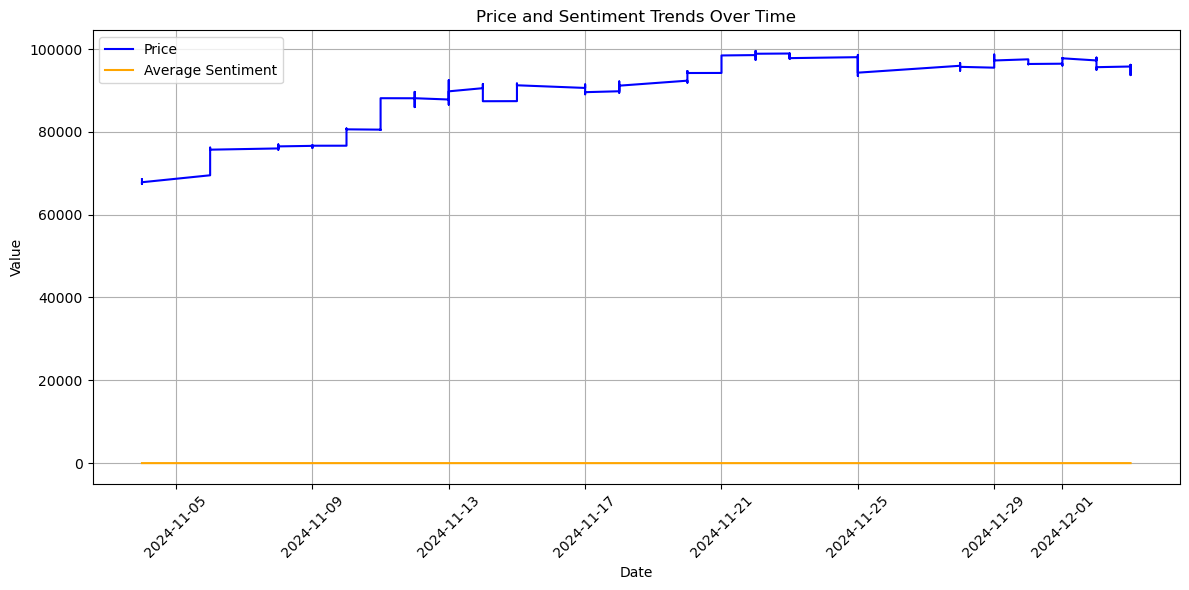

In [41]:
# Plot sentiment vs. price trends
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['price'], label='Price', color='blue')
plt.plot(merged_data['date'], merged_data['average_sentiment'], label='Average Sentiment', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Price and Sentiment Trends Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
# Calculate correlation matrix
correlation_matrix = merged_data[['price', 'average_sentiment']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      price  average_sentiment
price              1.000000           0.169675
average_sentiment  0.169675           1.000000


In [43]:
# Add price differences
merged_data['price_diff'] = merged_data['price'].diff()

# Add moving averages
merged_data['price_ma_7'] = merged_data['price'].rolling(window=7).mean()
merged_data['price_ma_30'] = merged_data['price'].rolling(window=30).mean()

# Add lagged sentiment scores
merged_data['lagged_sentiment_1'] = merged_data['average_sentiment'].shift(1)
merged_data['lagged_sentiment_7'] = merged_data['average_sentiment'].shift(7)


In [44]:
# Display the first few rows of the updated data
print("Updated Data Sample:")
print(merged_data.head())


Updated Data Sample:
            timestamp         price        date  created_at  \
0 2024-11-04 14:11:19  68588.815748  2024-11-04  2024-11-04   
1 2024-11-04 15:07:23  68369.510940  2024-11-04  2024-11-04   
2 2024-11-04 16:09:13  68447.316316  2024-11-04  2024-11-04   
3 2024-11-04 17:21:00  67502.476606  2024-11-04  2024-11-04   
4 2024-11-04 18:10:36  67627.438290  2024-11-04  2024-11-04   

   average_sentiment  price_diff  price_ma_7  price_ma_30  lagged_sentiment_1  \
0                0.0         NaN         NaN          NaN                 NaN   
1                0.0 -219.304808         NaN          NaN                 0.0   
2                0.0   77.805376         NaN          NaN                 0.0   
3                0.0 -944.839710         NaN          NaN                 0.0   
4                0.0  124.961684         NaN          NaN                 0.0   

   lagged_sentiment_7  
0                 NaN  
1                 NaN  
2                 NaN  
3                

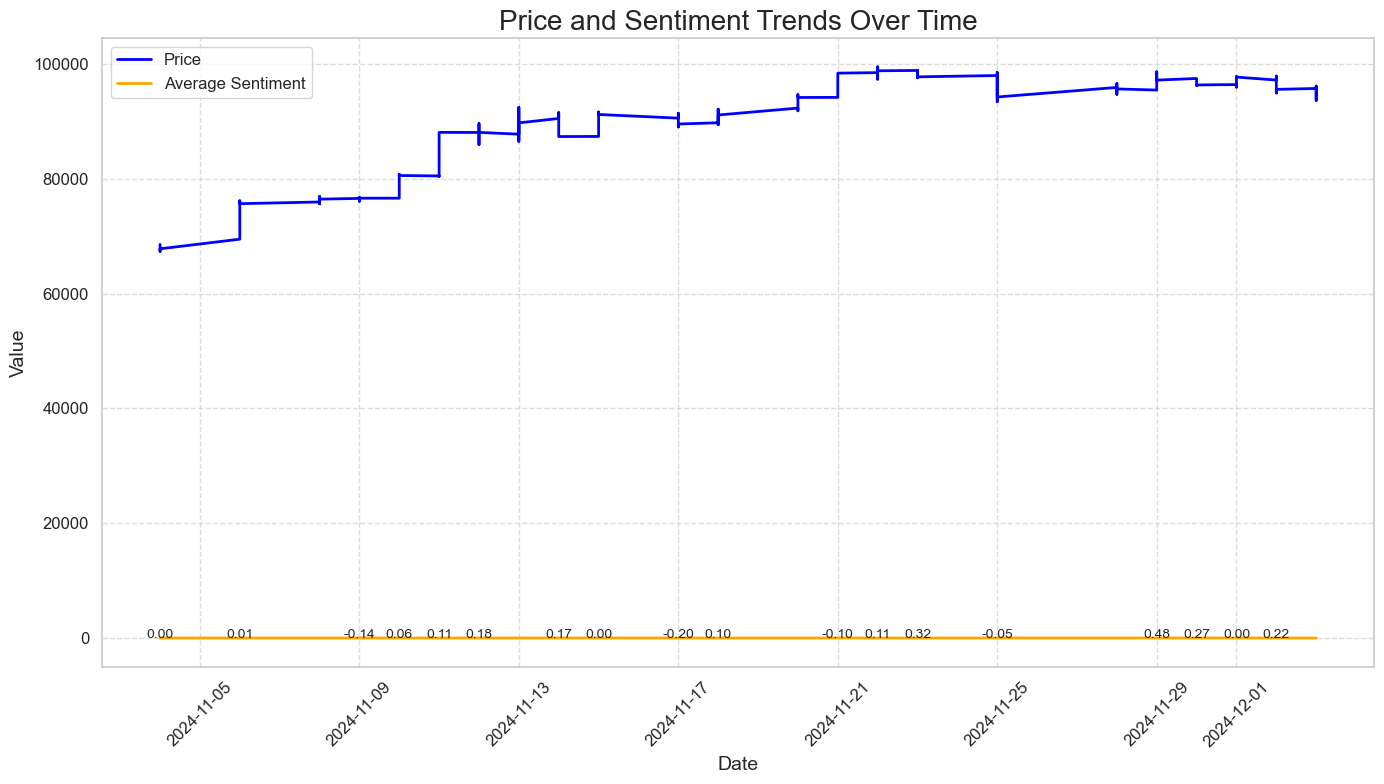

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))

# Plot price trends
plt.plot(merged_data['date'], merged_data['price'], label='Price', color='blue', linewidth=2)

# Plot sentiment trends
plt.plot(merged_data['date'], merged_data['average_sentiment'], label='Average Sentiment', color='orange', linewidth=2)

# Add titles and labels
plt.title('Price and Sentiment Trends Over Time', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(fontsize=12)

# Annotate significant peaks and dips
for i, val in enumerate(merged_data['average_sentiment']):
    if i % 30 == 0 or abs(val) > 0.5:  # Annotate every 30th point or scores above/below ±0.5
        plt.text(merged_data['date'][i], val, f"{val:.2f}", fontsize=10, ha='center')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


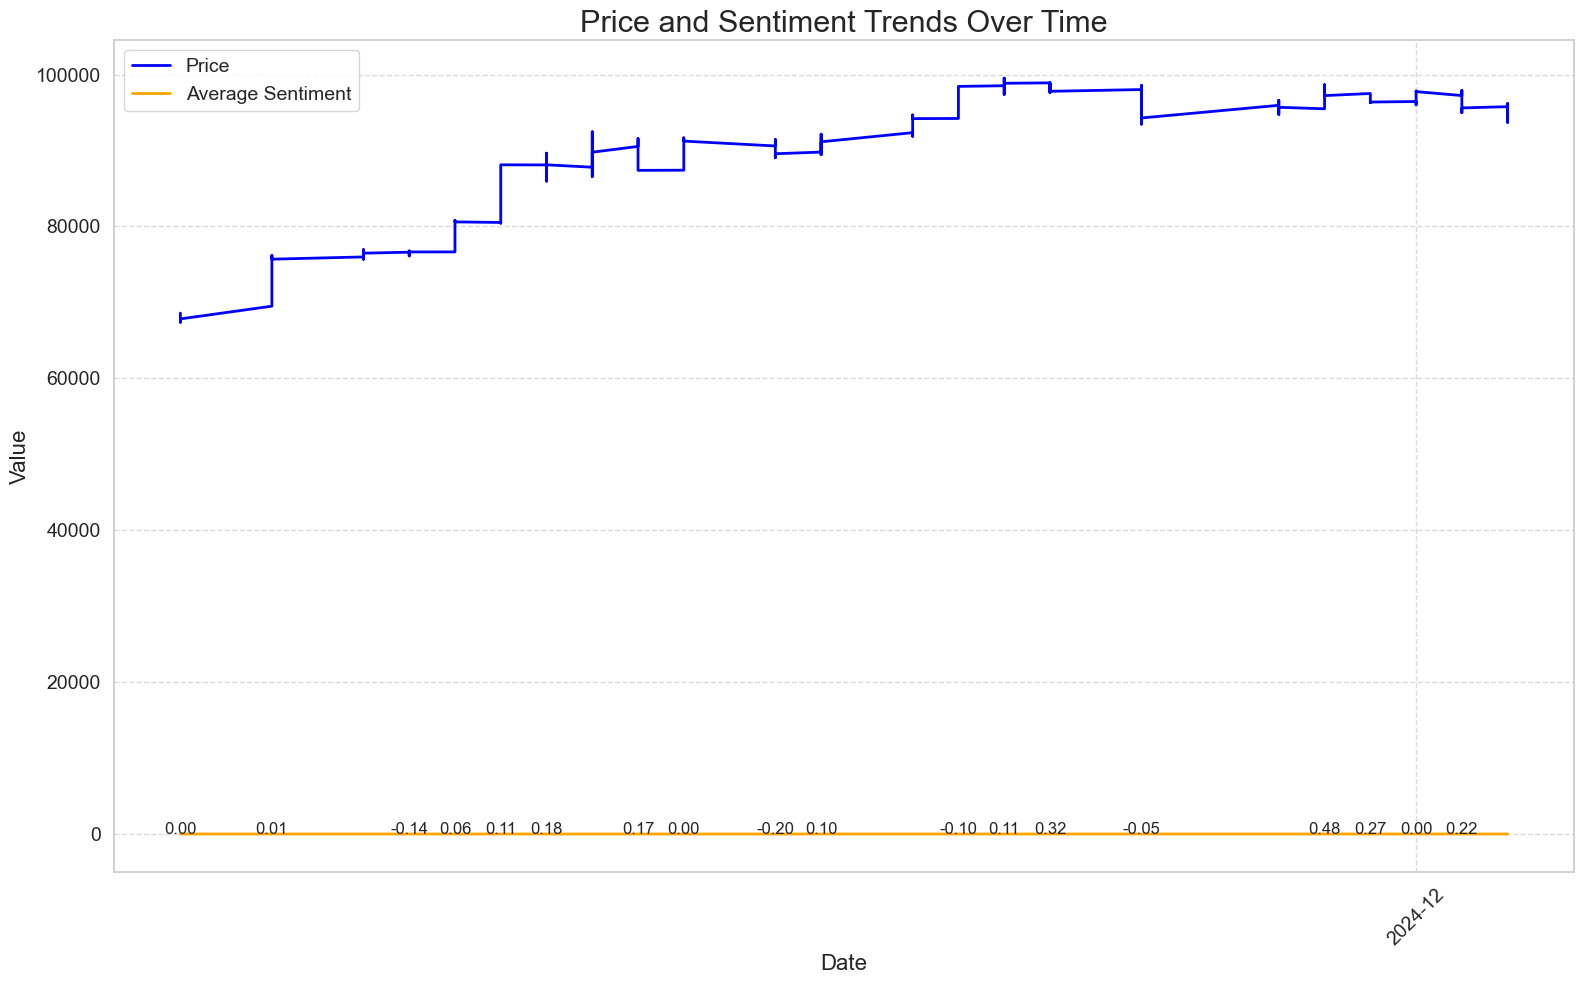

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(16, 10))

# Plot price trends
plt.plot(merged_data['date'], merged_data['price'], label='Price', color='blue', linewidth=2)

# Plot sentiment trends
plt.plot(merged_data['date'], merged_data['average_sentiment'], label='Average Sentiment', color='orange', linewidth=2)

# Add titles and labels
plt.title('Price and Sentiment Trends Over Time', fontsize=22)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Add a legend
plt.legend(fontsize=14)

# Annotate significant peaks and dips
for i, val in enumerate(merged_data['average_sentiment']):
    if i % 30 == 0 or abs(val) > 0.5:  # Annotate every 30th point or scores above/below ±0.5
        plt.text(merged_data['date'][i], val, f"{val:.2f}", fontsize=12, ha='center')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#This visualization is relevant for understanding the relationship between price and sentiment over a given period. 
#The significant difference in the scales of the two trends suggests that while the price has seen substantial changes, 
#the average sentiment has remained relatively stable with minor fluctuations. 
#This could be of interest to analysts and researchers studying market behavior, investor sentiment, and their potential impact on pricing trends.

#Transcription of Values:
#X-Axis Values: 0.00, 0.01, -0.14, 0.06, 0.11, 0.18, 0.17, 0.00, -0.20, 0.10, -0.10, 0.11, 0.32, -0.05, 0.48, 0.27, 0.00, 0.22, 2024-12

#Y-Axis Values: 0 to 100,000



C:\Users\damil\AppData\Local\Temp\ipykernel_14608\1449036589.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


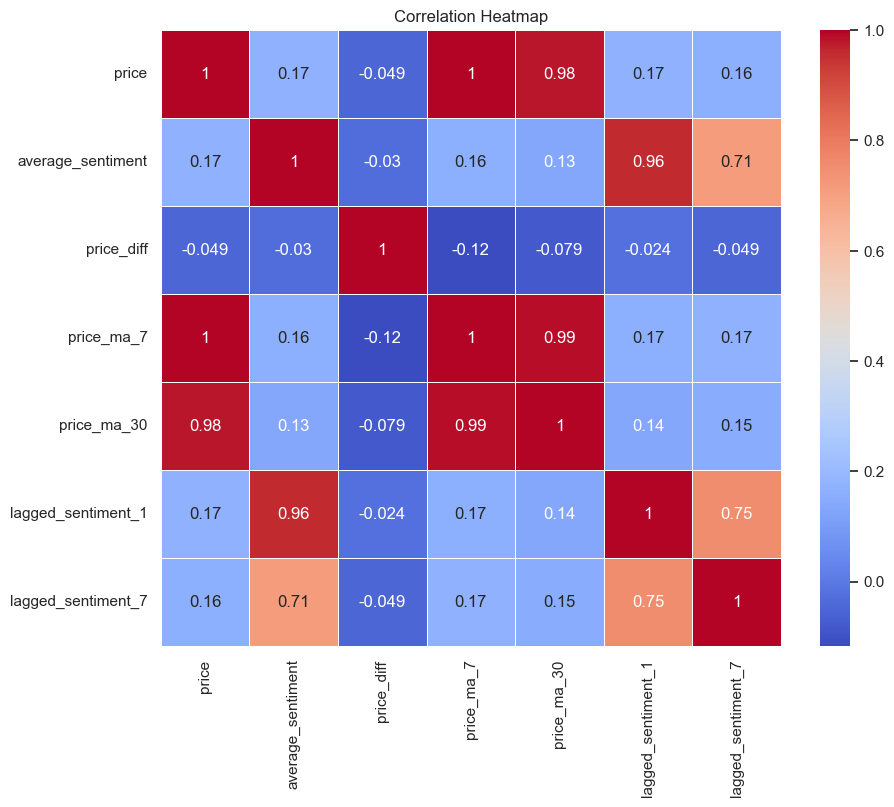

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


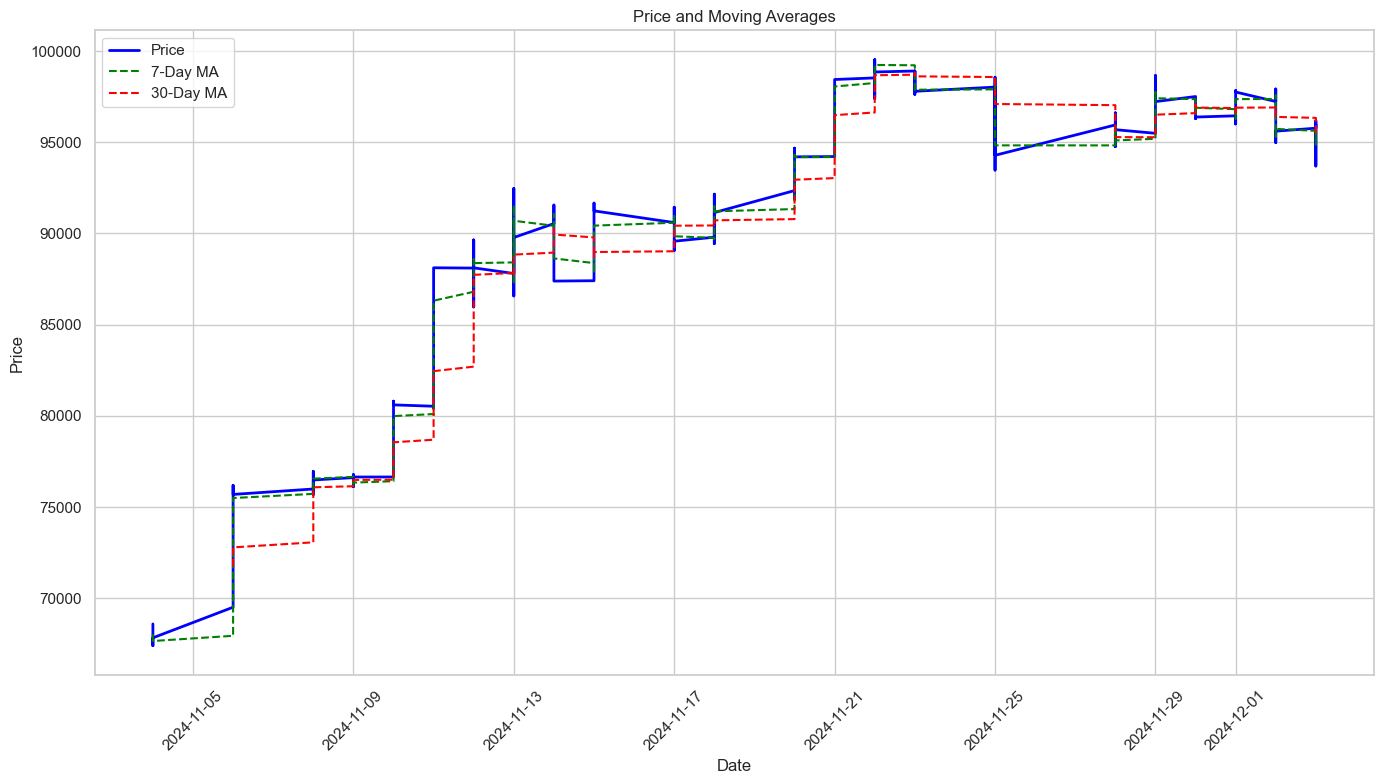

In [48]:
# Calculate moving averages
merged_data['price_ma_7'] = merged_data['price'].rolling(window=7).mean()
merged_data['price_ma_30'] = merged_data['price'].rolling(window=30).mean()

# Plot the moving averages
plt.figure(figsize=(14, 8))
plt.plot(merged_data['date'], merged_data['price'], label='Price', color='blue', linewidth=2)
plt.plot(merged_data['date'], merged_data['price_ma_7'], label='7-Day MA', color='green', linestyle='--')
plt.plot(merged_data['date'], merged_data['price_ma_30'], label='30-Day MA', color='red', linestyle='--')
plt.title('Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


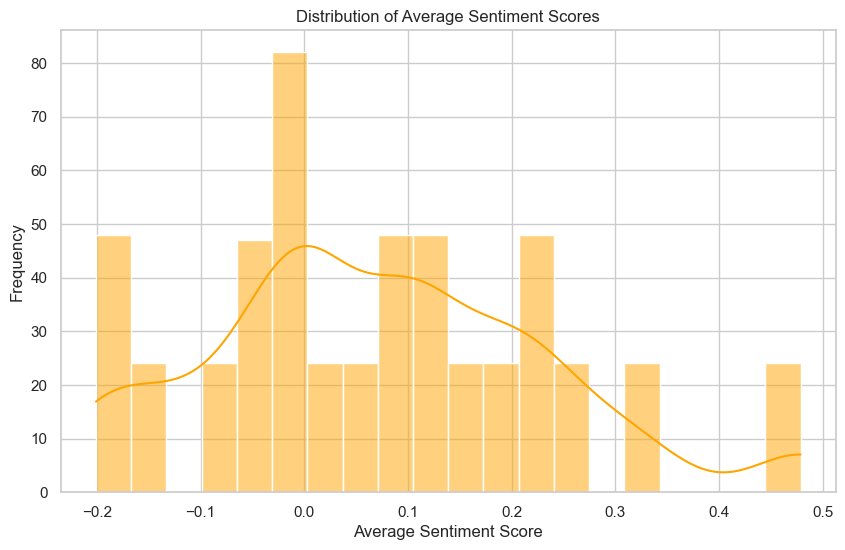

In [49]:
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['average_sentiment'], bins=20, kde=True, color='orange')
plt.title('Distribution of Average Sentiment Scores')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


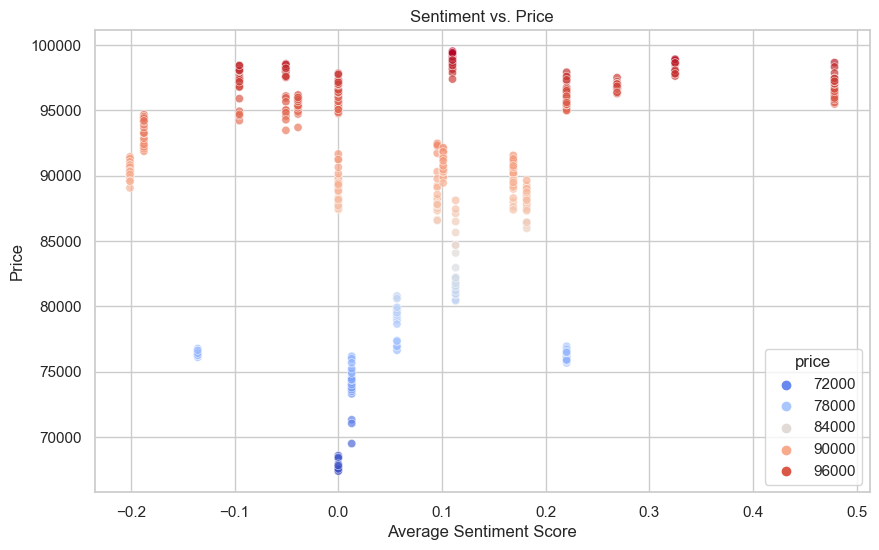

In [50]:
# Scatter plot of sentiment vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_sentiment', y='price', data=merged_data, hue='price', palette='coolwarm', alpha=0.7)
plt.title('Sentiment vs. Price')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Price')
plt.grid(True)
plt.show()


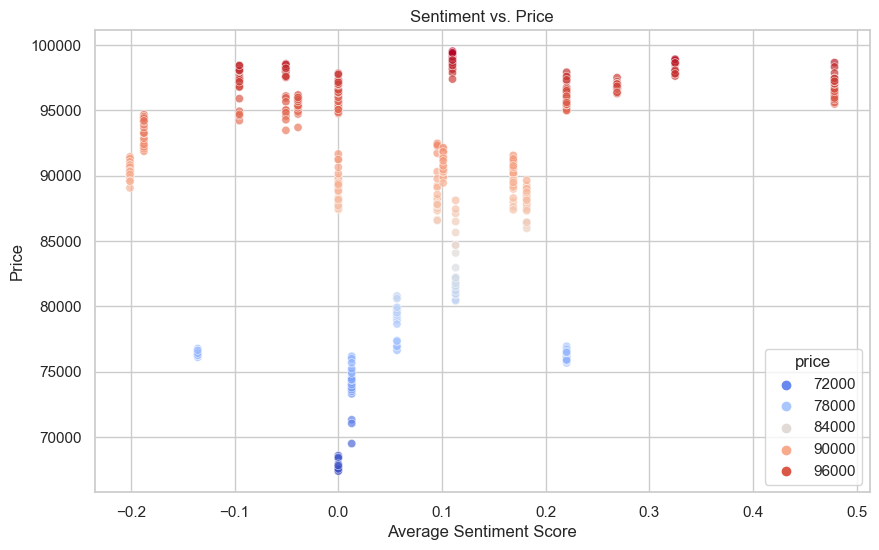

In [51]:
# Scatter plot of sentiment vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_sentiment', y='price', data=merged_data, hue='price', palette='coolwarm', alpha=0.7)
plt.title('Sentiment vs. Price')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Price')
plt.grid(True)
plt.show()


C:\Users\damil\AppData\Local\Temp\ipykernel_14608\3247200256.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


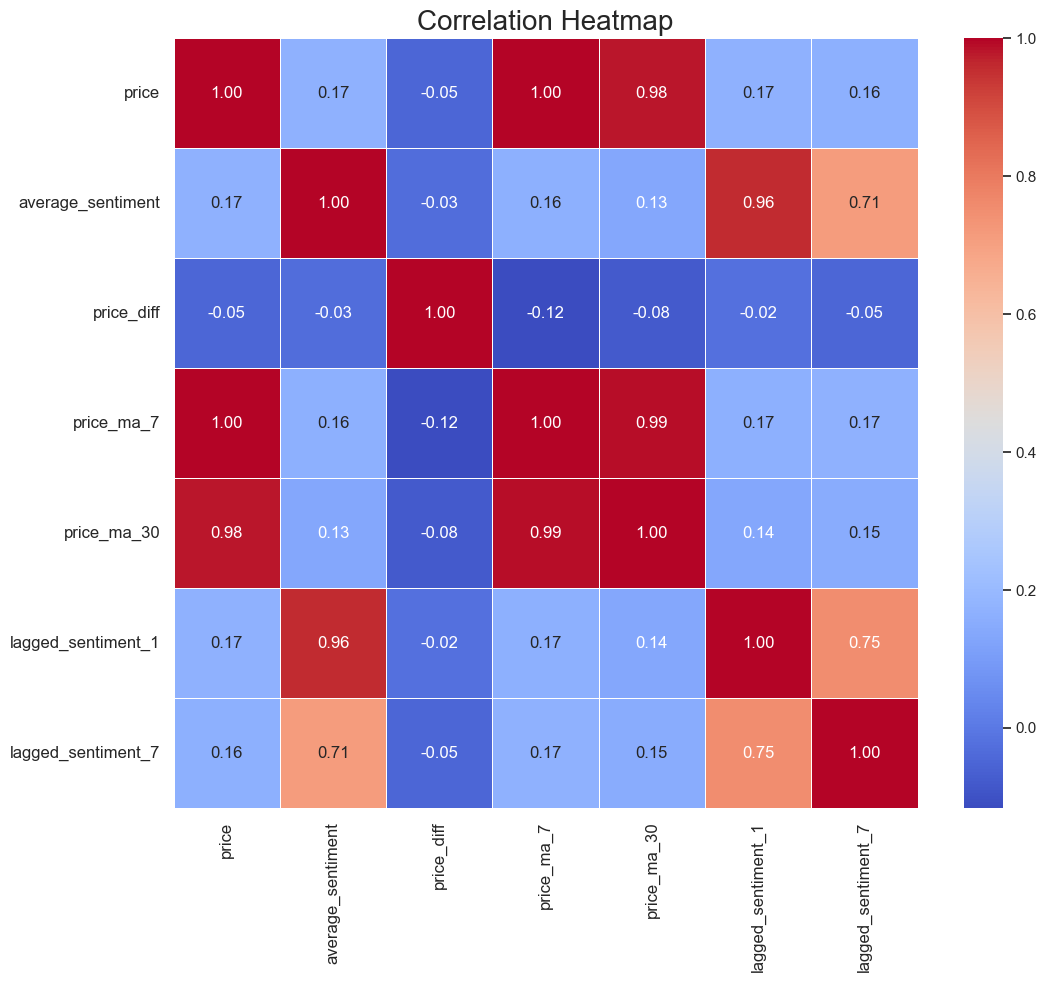

In [52]:


# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


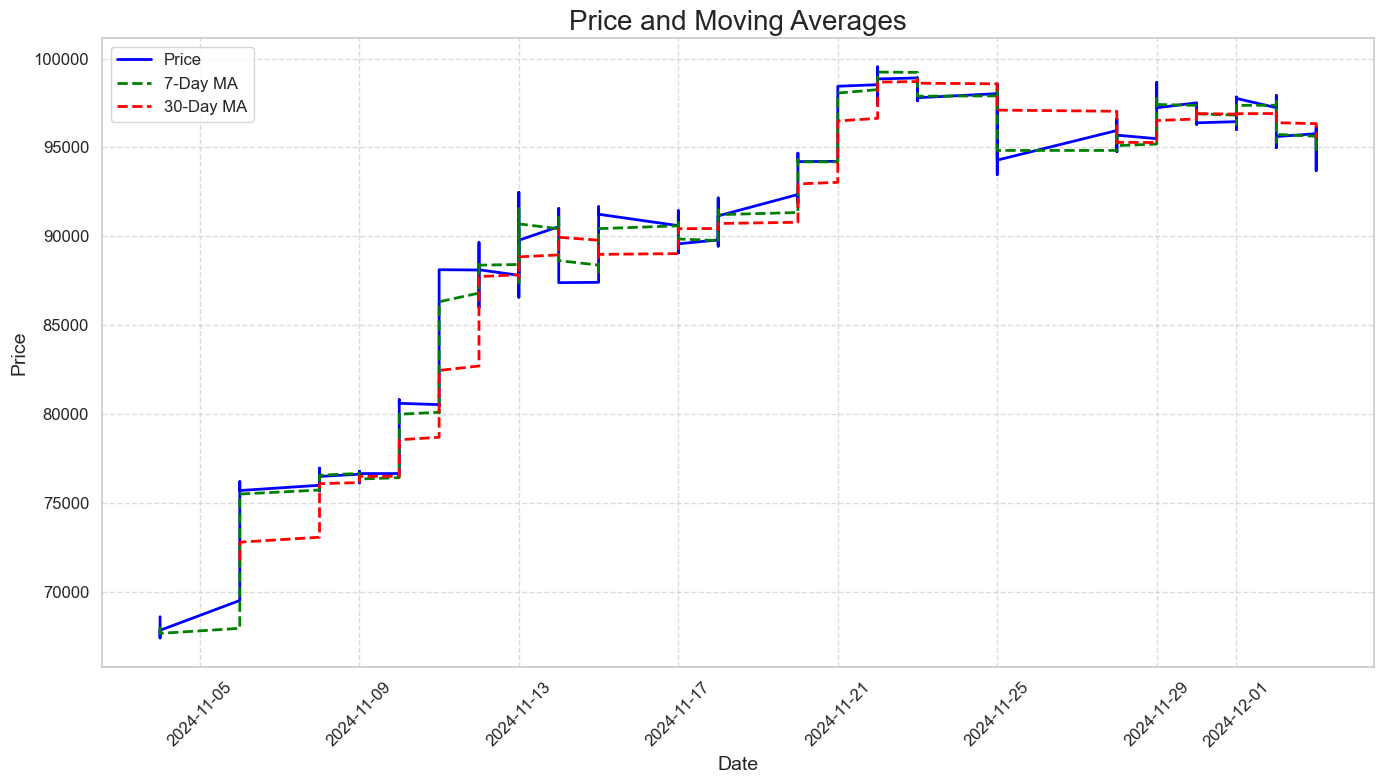

In [53]:
# Calculate moving averages
merged_data['price_ma_7'] = merged_data['price'].rolling(window=7).mean()
merged_data['price_ma_30'] = merged_data['price'].rolling(window=30).mean()

# Plot the moving averages
plt.figure(figsize=(14, 8))
plt.plot(merged_data['date'], merged_data['price'], label='Price', color='blue', linewidth=2)
plt.plot(merged_data['date'], merged_data['price_ma_7'], label='7-Day MA', color='green', linestyle='--', linewidth=2)
plt.plot(merged_data['date'], merged_data['price_ma_30'], label='30-Day MA', color='red', linestyle='--', linewidth=2)
plt.title('Price and Moving Averages', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


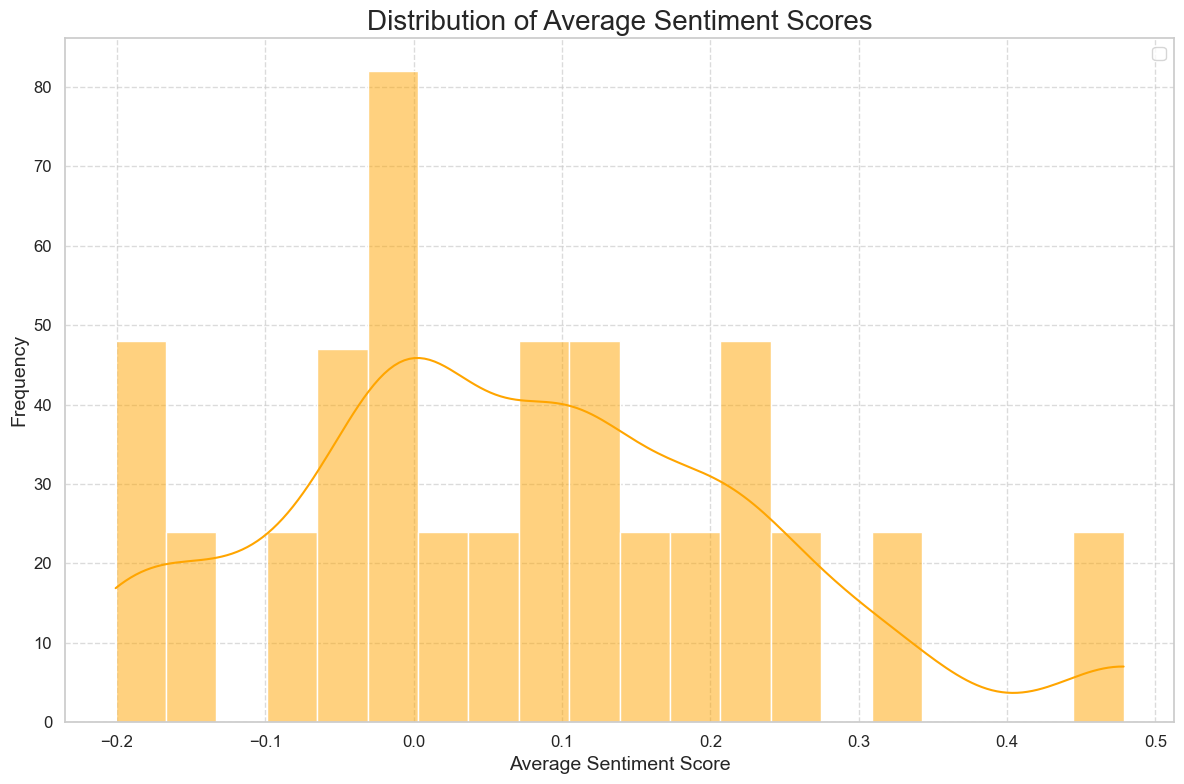

In [55]:
# Plot sentiment distribution
plt.figure(figsize=(12, 8))
sns.histplot(merged_data['average_sentiment'], bins=20, kde=True, color='orange')
plt.title('Distribution of Average Sentiment Scores', fontsize=20)
plt.xlabel('Average Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


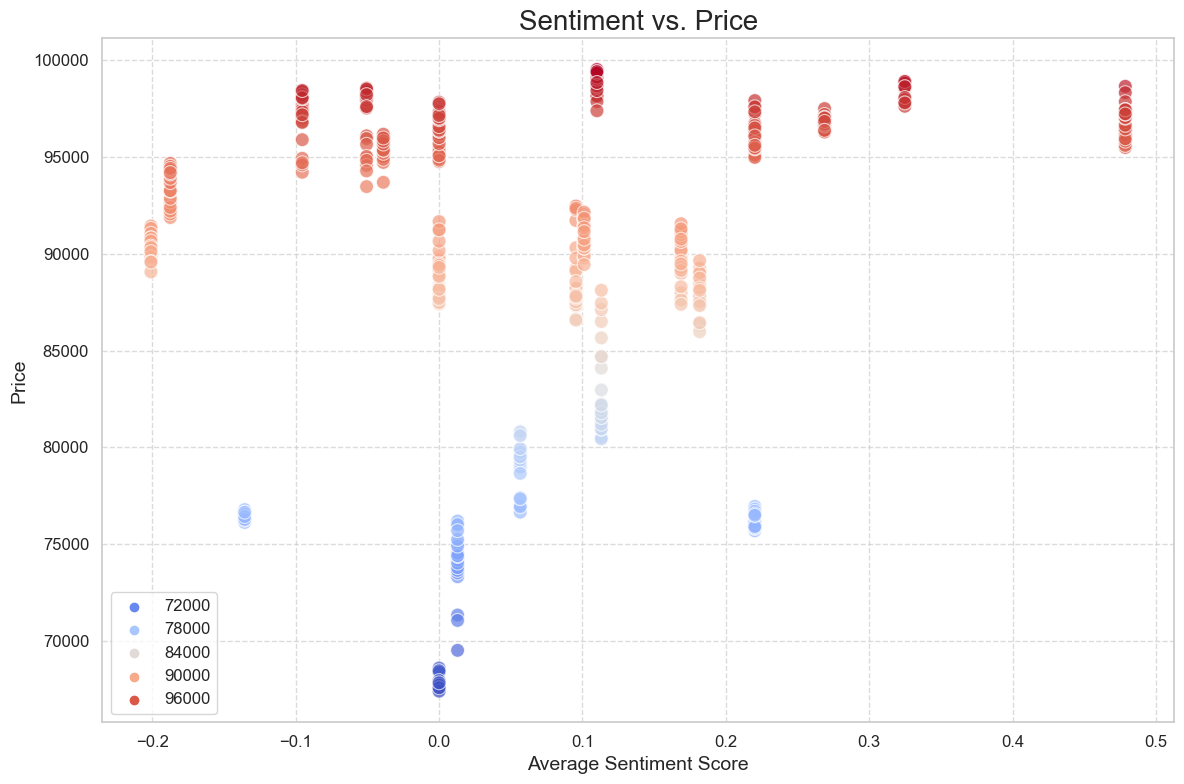

In [56]:
# Scatter plot of sentiment vs. price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='average_sentiment', y='price', data=merged_data, hue='price', palette='coolwarm', alpha=0.7, s=100)
plt.title('Sentiment vs. Price', fontsize=20)
plt.xlabel('Average Sentiment Score', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


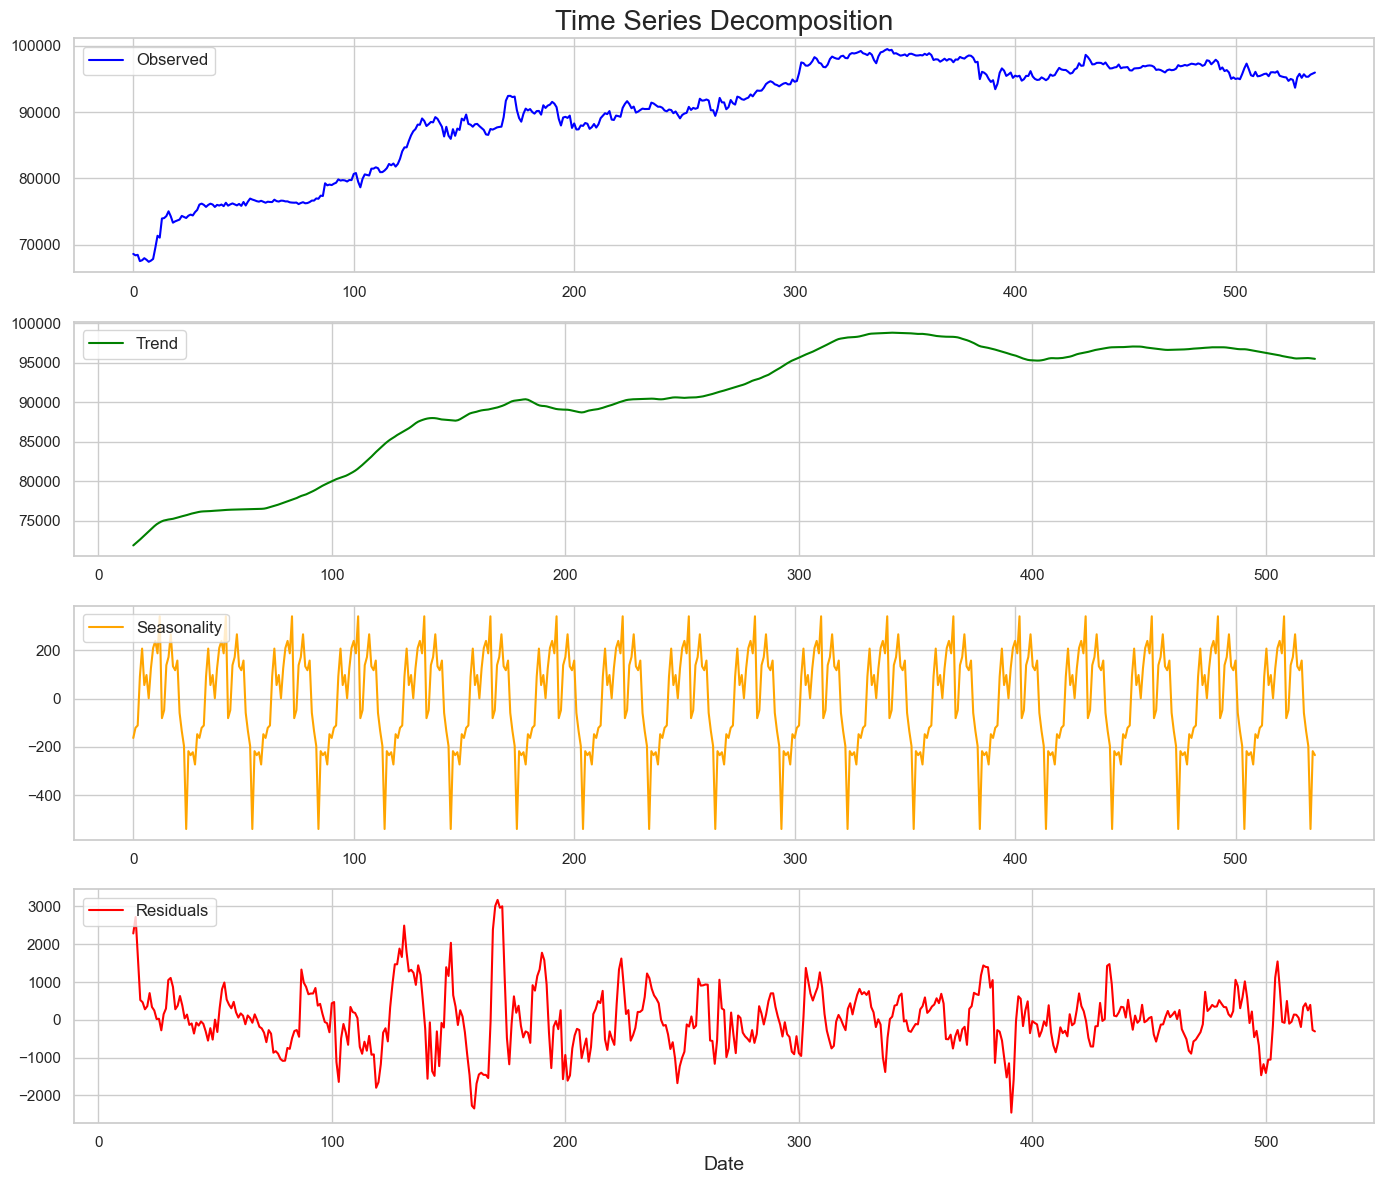

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(merged_data['price'], model='additive', period=30)

# Plot the decomposition
plt.figure(figsize=(14, 12))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.legend(loc='upper left', fontsize=12)
plt.title('Time Series Decomposition', fontsize=20)
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left', fontsize=12)
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left', fontsize=12)
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()


In [58]:
#feature engineering 

# Create lagged features for price and sentiment. the previous value of the time series that can help predict future variables
merged_data['price_lag_1'] = merged_data['price'].shift(1)
merged_data['price_lag_7'] = merged_data['price'].shift(7)
merged_data['sentiment_lag_1'] = merged_data['average_sentiment'].shift(1)
merged_data['sentiment_lag_7'] = merged_data['average_sentiment'].shift(7)


In [59]:
# Create rolling mean and standard deviation for price
merged_data['price_roll_mean_7'] = merged_data['price'].rolling(window=7).mean()
merged_data['price_roll_std_7'] = merged_data['price'].rolling(window=7).std()
merged_data['price_roll_mean_30'] = merged_data['price'].rolling(window=30).mean()
merged_data['price_roll_std_30'] = merged_data['price'].rolling(window=30).std()


In [60]:
# Create interaction terms
merged_data['price_sentiment_interaction'] = merged_data['price'] * merged_data['average_sentiment']


In [63]:
#feature selections

# Calculate correlation matrix
correlation_matrix = merged_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                price  average_sentiment  price_diff  \
price                        1.000000           0.169675   -0.048947   
average_sentiment            0.169675           1.000000   -0.030333   
price_diff                  -0.048947          -0.030333    1.000000   
price_ma_7                   0.995639           0.163778   -0.116839   
price_ma_30                  0.982385           0.132481   -0.078848   
lagged_sentiment_1           0.170125           0.959204   -0.023608   
lagged_sentiment_7           0.162500           0.713337   -0.049179   
price_lag_1                  0.997617           0.169716   -0.117739   
price_lag_7                  0.985186           0.161734   -0.119337   
sentiment_lag_1              0.170125           0.959204   -0.023608   
sentiment_lag_7              0.162500           0.713337   -0.049179   
price_roll_mean_7            0.995639           0.163778   -0.116839   
price_roll_std_7            -0.092668       

C:\Users\damil\AppData\Local\Temp\ipykernel_14608\1096382678.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


In [64]:
from sklearn.ensemble import RandomForestRegressor

# Define the features and target variable
features = merged_data.drop(columns=['timestamp', 'date', 'price', 'created_at'])
target = merged_data['price']

# Handle missing values
features.fillna(0, inplace=True)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print("Feature Importances:")
print(feature_importances)


Feature Importances:
price_lag_1                    0.293905
price_roll_mean_30             0.219248
price_ma_7                     0.165105
price_roll_mean_7              0.137559
price_ma_30                    0.114840
price_lag_7                    0.064395
price_diff                     0.002099
price_sentiment_interaction    0.001750
price_roll_std_7               0.000312
price_roll_std_30              0.000228
sentiment_lag_1                0.000199
average_sentiment              0.000152
lagged_sentiment_1             0.000142
lagged_sentiment_7             0.000037
sentiment_lag_7                0.000029
dtype: float64


In [65]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
features = merged_data[['price_lag_1', 'price_roll_mean_30', 'price_ma_7', 'price_roll_mean_7', 'price_ma_30', 'price_lag_7']]
target = merged_data['price']

# Handle missing values
features.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


C:\Users\damil\AppData\Local\Temp\ipykernel_14608\3297150662.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)


In [66]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
features = merged_data[['price_lag_1', 'price_roll_mean_30', 'price_ma_7', 'price_roll_mean_7', 'price_ma_30', 'price_lag_7']]
target = merged_data['price']

# Handle missing values using .loc to avoid the warning
features.loc[:, :] = features.fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


C:\Users\damil\AppData\Local\Temp\ipykernel_14608\4034342483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[:, :] = features.fillna(0)


In [67]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
features = merged_data[['price_lag_1', 'price_roll_mean_30', 'price_ma_7', 'price_roll_mean_7', 'price_ma_30', 'price_lag_7']]
target = merged_data['price']

# Handle missing values using .loc to avoid the warning
features = features.copy()  # Create a copy of the DataFrame
features.loc[:, :] = features.fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


RMSE: 6549.424690936508
MAE: 998.2486848766569
R-squared: 0.524757873182602


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
#These metrics give us a good starting point. 
#The RMSE and MAE values indicate the average error in our predictions, 
#while the R-squared value shows that our model explains about 52% of the variance in the data.

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluating the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest RMSE: 523.6338855666103
Random Forest MAE: 396.57613905212054
Random Forest R-squared: 0.9969621654908073


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


xgb_model = xgb.XGBRegressor(random_state=42)

# Defining the hyperparameters grid 
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initializing the Random Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Train the model
random_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost RMSE: 566.7876034260951
XGBoost MAE: 385.44978997285267
XGBoost R-squared: 0.9964408252542178


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
import joblib

# Save the best Random Forest model


# Save the best XGBoost model
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

In [75]:
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [77]:
# Load the merged data
merged_data = pd.read_csv('merged_crypto_sentiment_data.csv')

# Create lagged features for price and sentiment
merged_data['price_lag_1'] = merged_data['price'].shift(1)
merged_data['price_lag_7'] = merged_data['price'].shift(7)

# Create rolling mean and standard deviation for price
merged_data['price_roll_mean_7'] = merged_data['price'].rolling(window=7).mean()
merged_data['price_roll_mean_30'] = merged_data['price'].rolling(window=30).mean()
merged_data['price_roll_std_7'] = merged_data['price'].rolling(window=7).std()
merged_data['price_roll_std_30'] = merged_data['price'].rolling(window=30).std()

# Create moving averages
merged_data['price_ma_7'] = merged_data['price'].rolling(window=7).mean()
merged_data['price_ma_30'] = merged_data['price'].rolling(window=30).mean()

# Handle missing values
merged_data.fillna(0, inplace=True)

# Define the features for prediction
features = merged_data[['price_lag_1', 'price_roll_mean_30', 'price_ma_7', 'price_roll_mean_7', 'price_ma_30', 'price_lag_7']]

# Make predictions
predictions = best_rf_model.predict(features)

# Add predictions to the DataFrame
merged_data['predicted_price'] = predictions

# Save the predictions to a new CSV file
merged_data.to_csv('predicted_crypto_prices.csv', index=False)

# Display the first few rows of the predictions
print("Predicted Data Sample:")
print(merged_data.head())


Predicted Data Sample:
             timestamp         price        date  created_at  \
0  2024-11-04 14:11:19  68588.815748  2024-11-04  2024-11-04   
1  2024-11-04 15:07:23  68369.510940  2024-11-04  2024-11-04   
2  2024-11-04 16:09:13  68447.316316  2024-11-04  2024-11-04   
3  2024-11-04 17:21:00  67502.476606  2024-11-04  2024-11-04   
4  2024-11-04 18:10:36  67627.438290  2024-11-04  2024-11-04   

   average_sentiment   price_lag_1  price_lag_7  price_roll_mean_7  \
0                0.0      0.000000          0.0                0.0   
1                0.0  68588.815748          0.0                0.0   
2                0.0  68369.510940          0.0                0.0   
3                0.0  68447.316316          0.0                0.0   
4                0.0  67502.476606          0.0                0.0   

   price_roll_mean_30  price_roll_std_7  price_roll_std_30  price_ma_7  \
0                 0.0               0.0                0.0         0.0   
1                 0.0  